# This is my first step in deep learning so I've started with Mnist dataset to classify the handwritten digits. In this notebook I've explained the the model and just predicted the labels. 

# Hope you learn something out of it

# Cheers!

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#importing required libraries 

from keras.datasets import mnist
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


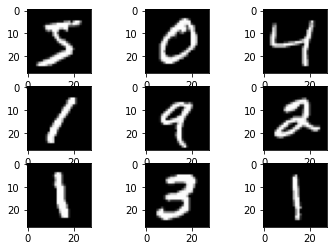

In [6]:
# example of loading the mnist dataset

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
#trainX and testX has the images while trainy and testy has the labels
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

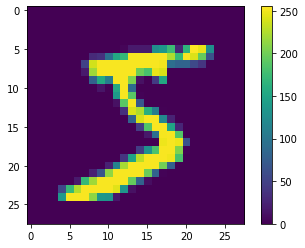

In [7]:
#viewing the first image of the dataset
plt.figure()
plt.imshow(trainX[0])
plt.colorbar()
plt.grid(False)
plt.show()

The pixel value currently ranges from 0 to 255. It needs to be scaled.

In [8]:
#dividing the images by 255 will make the range between 0 to 1
trainX = trainX / 255.0
testX = testX / 255.0

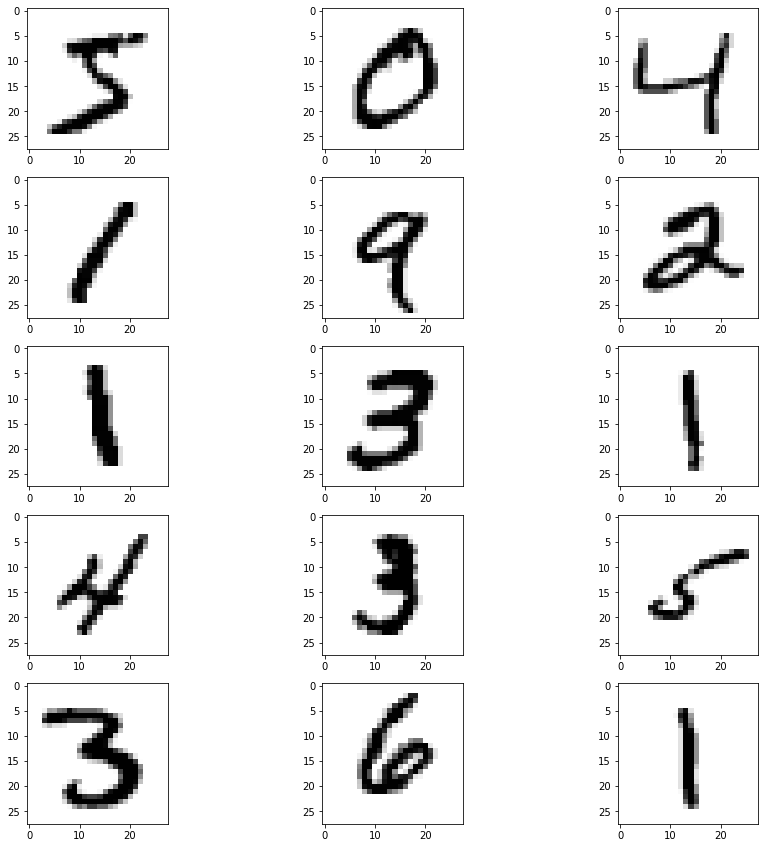

In [9]:
#viewing 15 images from the dataset
plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.imshow(trainX[i],cmap=plt.cm.binary)
    
plt.show()

In [10]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),#this will make the image 1-D.
    tf.keras.layers.Dense(128, activation='relu'), #Dense layer is also called as a fully connected layers with 128 units and relu activation.
    tf.keras.layers.Dropout(0.2),#Dropout is a regularization technique. it helps the model to learn relevant information thus prevent overfitting.
    tf.keras.layers.Dense(10) #last layer which will output 10 labels
])

In [11]:
model.compile(optimizer='adam', #we are using adam optimizer tho there are several other options like rmsprop and momentum
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(trainX, trainy, epochs=10)# training the model with 10 epochs

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4875 - accuracy: 0.8562
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1511 - accuracy: 0.9555
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1078 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0873 - accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0722 - accuracy: 0.9773
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0624 - accuracy: 0.9802
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0559 - accuracy: 0.9819
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0488 - accuracy: 0.9847
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452 - accuracy: 0.9860
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.041

In [13]:
test_loss, test_acc = model.evaluate(testX,  testy, verbose=2)#testing our model on test dataset

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0673 - accuracy: 0.9783

Test accuracy: 0.9782999753952026
